In [29]:
import feyn

ql = feyn.QLattice(random_seed=42)

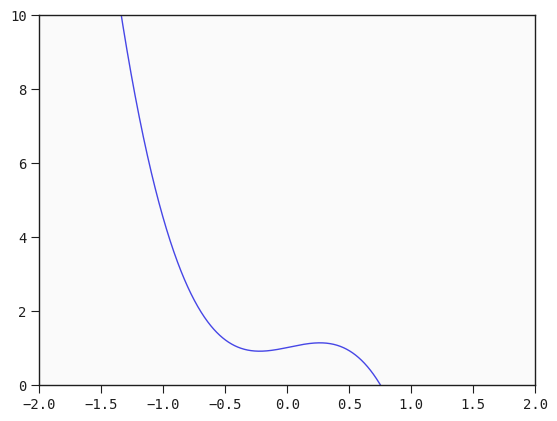

In [30]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-1.5, 1.5, 1000)
y = 2**(X) - 4*X**3

plt.plot(X, y, linewidth=1)
plt.ylim(0, 10)
plt.xlim(-2, 2)
plt.show()

In [31]:
import pandas as pd

data = np.c_[X, y]
data = pd.DataFrame(data, columns=["x", "y"])

In [32]:
data

,x,y
0,-1.500000,13.853553
1,-1.496997,13.773371
2,-1.493994,13.693515
3,-1.490991,13.613983
4,-1.487988,13.534775
...,...,...
995,1.487988,-10.373291
996,1.490991,-10.447395
997,1.493994,-10.521810
998,1.496997,-10.596535


In [33]:
models = ql.auto_run(data, output_name='y')

In [34]:
for model in models:
    sympy_model = model.sympify(signif=3)
    display(sympy_model.as_expr())

-5.59*(0.467 - 0.814*x)*log(exp(-0.86*(x + 0.261)**2 - 2.0*exp(-4.0*tanh(0.449*x + 2.24)**2))) + 0.732

11.7*(0.0327 - 0.711*x)*(0.525 - 0.00132*x)*(0.824*x + (0.988 - 0.6*x)*(-1.5*x - 1.07) + 0.901) + 1.03

-10.3*(-0.475*x - 0.011)*(0.781*x - 0.361)*(-1.03*x + exp(-6.93*(1 - 0.5*x)**2 - 2.68*(0.142*x + 1)**2) - 0.389) + 0.983

6.08*(-0.642*x - 0.304)*(x - 0.265)**2 + 1.11 + 22.9*exp(-8.04*(-0.154*x - 1)**2)

8.37*(0.265 - x)**2*(-0.471*x - 0.218) + 1.12

-8.14*(-0.98*x - 0.341)*(-0.719*x - 0.046)*(0.688*x - 0.33) + 0.955

-10.1*(0.795 - 0.00205*x)*(0.779*x + 0.0754)*(0.789*x - 0.384)*(0.797*x + 0.262) + 0.939

3.24*(0.732 - 0.845*x)*(-0.816*x + 1.44*(-x - 0.683)**2 + 0.0743) - 0.773

-6.34*(0.0265 - 0.706*x)*(0.355*x + 0.125)*(-2.49*x + 0.973 + 1/((1.42*x + 6.58)*(1.48*x - 0.0561))) + 0.958

-5.93*(1.08*x + 0.39)*(-0.569*x + (0.551 - 1.0*x)*(-0.618*x - 0.643) + 0.342) + 0.966

In [46]:
import sympy as smp
from sympy.utilities.lambdify import lambdify

sympy_model = models[0].sympify(signif=3)
x_symbol = smp.symbols("x")

f_qlattice = lambdify([x_symbol], sympy_model)

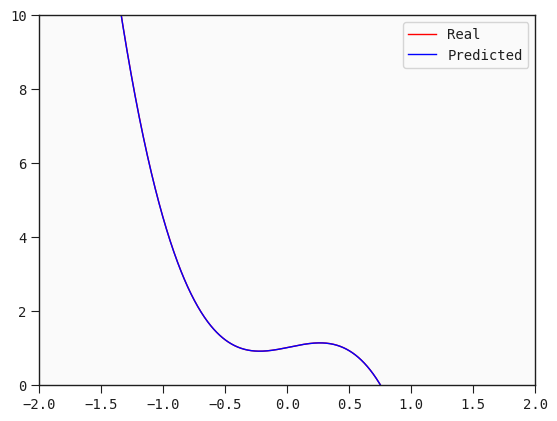

In [47]:
y_model = f_qlattice(X)

plt.plot(X, y, linewidth=1, label="Real", c="red")
plt.plot(X, y_model, linewidth=1, c="blue", label="Predicted")
plt.legend()
plt.ylim(0, 10)
plt.xlim(-2, 2)
plt.show()

In [37]:
import sys
sys.path.insert(1, r"D:\Program Files (x86)\TuringBot")

import turingbot as tb
import time

path = r'D:\Program Files (x86)\TuringBot\TuringBot.exe' 
# input_file = r'D:\Documents\Coding\Repositorios\Meus Repositórios\Symbolic-Regression\Phase Three - SR\TuringBot_tests\Data\saida_fixed.csv' 
# D:\Documents\Coding\Repositorios\Meus Repositórios\Symbolic-Regression\Phase Three - SR\TuringBot_tests\Data
# config_file = r'D:\Users\user\Desktop\settings.cfg' 

In [38]:
input_file = r'D:\Documents\Coding\Repositorios\Meus Repositórios\Symbolic-Regression\Phase Three - SR\qlattice_tests\output_test_1.csv' 

data.to_csv(input_file, index=False)

In [39]:
sim = tb.simulation()

sim.start_process(path, input_file)

time.sleep(900)

sim.refresh_functions()

In [40]:
print(*sim.functions, sep='\n')

[1, 1.04791, '12.01372097643715']
[3, 0.682821, '-8.436773924764067*x']
[5, 0.053299, '(-23.14121447600192)*(x+0.9071317937526382)']
[7, 0.0159198, '11.25206344114019*((x+0.6792862121970983)*x)']
[8, 0.00791654, 'pow(0.1630065825659493,x)-1.323718511489408']
[14, 0.00599825, '-0.9194846475347931+(-0.8719561934019529+(-0.5554826123847846-x))+pow(0.1665442421501921,x)']
[18, 0.00158037, 'pow(0.1630068490068925,x)-(0.01210099009642972*sin(36.29237927283661*x)+1.325485207751273)']
[21, 0.00100945, '11.87130093480443+((-23.39869486208349)*(1.422059874433312*sin(0.08190403889933123-(0.9428397305353684+(x-0.02877863650098623-0.9997843264439079)))+x))']
[24, 0.000741612, 'pow(0.1630066299944654,x)-(0.00680763962002019*tan(sin(40.71785561514414*x)+0.2504684582316337)+1.32041103299929)']
[26, 0.000716632, 'pow(0.1630065426144041,x)-(0.007124284634724421*tan(0.974236358237777*sin(40.71691094203351*x)+0.258049233311082)+1.320376608859904)']
[28, 0.000697158, '0.008352428102984371+pow(0.16300652768

In [43]:
x = smp.symbols("x")

from sympy.parsing.sympy_parser import parse_expr

expr = parse_expr(sim.functions[10][2])
expr

0.1630065276827401**x - 0.007224371233443383*tan(0.9608400412700419*sin(40.71671347721337*x) + 0.2704683583657616) - 1.32015785126225

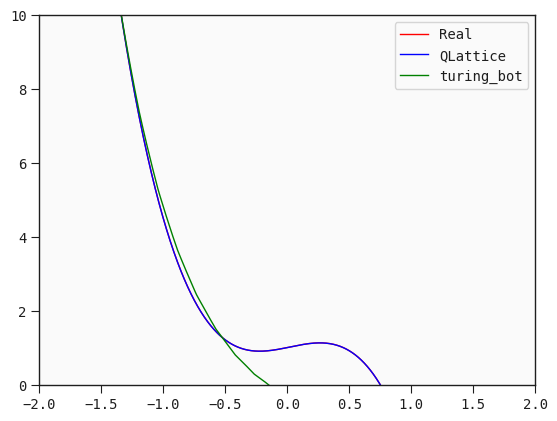

In [45]:
from sympy.utilities.lambdify import lambdify
f = lambdify([x], expr)

generated_y = f(np.array(data.x))

plt.plot(X, y, linewidth=1, label="Real", c="red")
plt.plot(X, y_model, linewidth=1, c="blue", label="QLattice")
plt.plot(data.x, generated_y, label="turing_bot", c="green", linewidth=1)
plt.legend()
plt.ylim(0, 10)
plt.xlim(-2, 2)
plt.show()

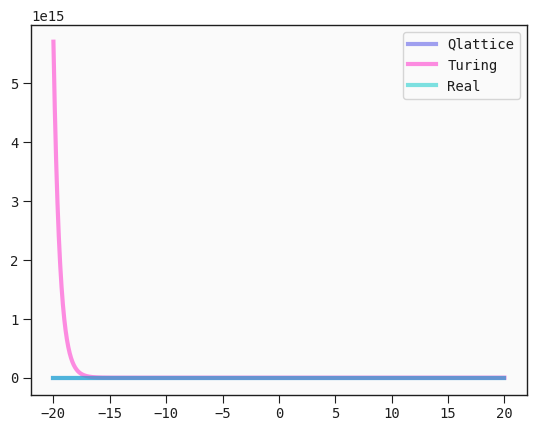

In [56]:
X = np.linspace(-20, 20, 1000)
y_qlattice = f_qlattice(X)
y_turing = f(X)
y_real = 2**(X) - 4*X**3

plt.plot(X, y_qlattice, label="Qlattice", alpha=0.5)
plt.plot(X, y_turing, label="Turing", alpha=0.5)
plt.plot(X, y_real, label="Real", alpha=0.5)
plt.legend()
plt.show()